# <font color='blue'> Matrices de correlación locales </font>

El objetivbo de este notebook es ejemplificar el cálculo, acomodo y graficación de matrices de correlación.

## <font color='crimson'> Importar los datos </font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataName='returns_SP500.csv'
dataLocation='./data'

returnsSP500=pd.read_csv(
    f'{dataLocation}/{dataName}',
    index_col=0,
    parse_dates=True
)

returnsSP500

,AAP_CD,AMZN_CD,AZO_CD,BBY_CD,BKNG_CD,CBS_CD,CCL_CD,CMCSA_CD,DHI_CD,DISCA_CD,...,LNT_UT,NEE_UT,NI_UT,NRG_UT,PCG_UT,PEG_UT,SO_UT,SRE_UT,WEC_UT,XEL_UT
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-04,0.007098,-0.006960,-0.009314,-0.015319,0.003521,-0.007663,-0.003856,0.005702,-0.008155,0.013158,...,0.013245,0.000000,-0.005171,-0.009429,0.000267,0.001650,-0.002284,-0.013089,0.003252,0.004835
2006-01-05,0.004780,0.008430,0.000870,-0.012564,0.010924,0.013752,-0.010541,0.001515,0.019728,0.000000,...,-0.006949,0.002612,-0.016631,-0.024508,-0.004546,-0.005560,-0.002576,0.027719,-0.004005,-0.000536
2006-01-06,-0.001136,0.004606,-0.010602,0.078450,0.005634,0.032471,0.003526,0.032033,-0.003216,0.003263,...,0.009370,0.001185,0.011434,-0.004758,0.011724,0.018661,0.005714,0.003625,0.007497,0.003746
2006-01-09,0.012874,-0.016641,0.015807,0.015815,-0.000432,-0.007372,0.010687,0.006212,0.069977,-0.003263,...,-0.006585,-0.004272,-0.006654,0.014419,-0.010920,-0.002370,-0.005141,-0.009408,0.004471,-0.002675
2006-01-10,0.001122,-0.030845,0.000000,0.009578,-0.006941,-0.017541,-0.015329,-0.001458,0.009715,0.001959,...,0.006930,-0.001191,-0.002865,-0.008153,-0.003756,-0.004756,-0.001433,0.001717,-0.001240,0.004809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.007173,-0.058771,-0.000218,-0.031231,-0.043013,-0.017829,-0.039534,-0.025451,-0.041940,-0.031824,...,-0.008479,-0.004584,-0.008790,-0.026781,-0.047219,-0.004946,0.000000,-0.011028,-0.004190,-0.009191
2018-12-24,-0.016582,-0.024613,-0.003906,-0.012770,-0.010190,-0.031392,-0.035084,-0.020354,-0.019826,-0.023426,...,-0.052930,-0.035247,-0.045552,-0.026414,0.017430,-0.049849,-0.046995,-0.040330,-0.054954,-0.046239
2018-12-26,0.040209,0.090254,0.019545,0.066752,0.052071,0.031622,0.027534,0.031843,0.036346,0.043189,...,0.011340,0.013356,0.006807,0.050051,0.007745,0.016303,0.014309,0.005478,0.012200,0.019561


Para bajar los datos de una lista de _tickers_, puedes usar la función `ep.get(company::str,inicio::tuple,fin::tuple)`:

In [8]:
lista=['LABB.MX','GENTERA.MX','WMT.MX'] #Genomma Lab, Gentera, Walmart
datos=dict()
inicio,fin=(2015,1,1),(2020,6,21)

for s in lista:
    datos[s]=ep.get(s,inicio,fin)

Los datos para LABB.MX se bajaron sin pedos.

Hay un total de 1373 registros.
Los datos para GENTERA.MX se bajaron sin pedos.

Hay un total de 1373 registros.
Los datos para WMT.MX se bajaron sin pedos.

Hay un total de 1373 registros.


Podemos ver qpdo con los últimos dos registros de Walmart.

In [9]:
datos['WMT.MX'][-3:-1]

[{'date': '2020-06-17',
  'open': 2671.530029,
  'high': 2671.530029,
  'low': 2650.5,
  'close': 2650.5,
  'adj_close': 2650.5,
  'volume': 41031},
 {'date': '2020-06-18',
  'open': 2656.0,
  'high': 2700.0,
  'low': 2656.0,
  'close': 2689.0,
  'adj_close': 2689.0,
  'volume': 48222}]

Este pedo se puede guardar en un archivo `json`:

In [10]:
with open('datos.json','w+') as arshivo:
    json.dump(datos,arshivo,ensure_ascii=False,indent=4) #Esto acomoda chido los datos y te deja usar UTF-8

# Mezclar los datos en una tabla sincronizada
Vamos a pensar sólo en los precios de cierre ajustados (_key_ `adj_close`, que consideran una corrección relacionada con el [reparto de dividendos](https://www.investopedia.com/terms/a/adjusted_closing_price.asp)).

In [11]:
tabla=pd.DataFrame()

for comp,dat in datos.items():
    X0=pd.DataFrame([x['adj_close'] for x in dat],
                    index=[pd.to_datetime(x['date']) for x in dat],
                    columns=[comp])
    tabla = pd.concat([tabla, X0], axis=1)
    
tabla

,LABB.MX,GENTERA.MX,WMT.MX
2015-01-02,26.190001,23.955343,1271.396484
2015-01-05,24.420000,23.334867,1271.396484
2015-01-06,25.160000,23.988884,1278.802612
2015-01-07,25.070000,23.544487,1294.409424
2015-01-08,25.110001,23.703800,1311.485718
...,...,...,...
2020-06-15,20.100000,10.430000,2616.179932
2020-06-16,20.350000,10.360000,2664.000000
2020-06-17,20.480000,10.350000,2650.500000
2020-06-18,20.000000,10.200000,2689.000000


Y con un `DataFrame` de Pandas ya es más fácil calcular, por ejemplo, los rendimientos (logarítmicos)

In [12]:
tabla_rends=pd.DataFrame(np.diff(np.log(tabla),axis=0),index=tabla.index[1:],columns=tabla.columns)
tabla_rends

,LABB.MX,GENTERA.MX,WMT.MX
2015-01-05,-0.069975,-0.026243,0.000000
2015-01-06,0.029853,0.027642,0.005808
2015-01-07,-0.003584,-0.018699,0.012130
2015-01-08,0.001594,0.006744,0.013106
2015-01-09,-0.011616,-0.006388,-0.011014
...,...,...,...
2020-06-15,-0.004963,-0.009542,-0.005269
2020-06-16,0.012361,-0.006734,0.018114
2020-06-17,0.006368,-0.000966,-0.005080
2020-06-18,-0.023717,-0.014599,0.014421


# Gráfica de la matriz de correlación

Primero calculamos la matriz de correlación. Las instancias `DataFrame` de Pandas tienen un método útil: `DataFrame.corr()`.

In [13]:
corr=tabla_rends.corr()

Graficamos con unos colores bien bergas.

Text(0.5, 0.98, 'Matriz de correlación (01/2015 - 06/2020)')

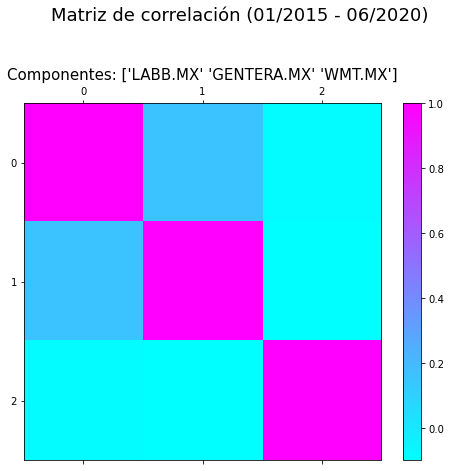

In [14]:
colores='cool'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

cax=axes.matshow(corr,cmap=colores)
fig.colorbar(cax,shrink=0.82)

axes.set_title('Componentes: {}'.format(tabla_rends.columns.values),fontsize=15)

plt.suptitle('Matriz de correlación ({:%m/%Y} - {:%m/%Y})'.format(
    tabla_rends.index[0],tabla_rends.index[-1]),fontsize=18)

Puedes guardar la tabla de los rendimientos logarítmicos en formato `CSV`.

In [15]:
tabla_rends.to_csv('rendimientos.csv')